In [1]:
# Developer's setting
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from datetime import datetime
# from datetime import timedelta

In [3]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('legend', fontsize=16)
axes_settings = {'linewidth'   : 2}
matplotlib.rc('axes', **axes_settings)

In [4]:
df = pd.read_csv('../results_ITSLIVE.csv', dtype=str)
for field in ['Duration (days)',
              'Pixel spacing (m)',
              'Assigned-x-error',
              'Assigned-y-error',
              'SAV-uncertainty-x',
              'SAV-uncertainty-y',
              'SAV-peak-x',
              'SAV-peak-y',
              'SAV-outlier-percent',
              'LSR-uncertainty-nm',
              'LSR-uncertainty-sh',
              'pt0_vxavg',
              'pt0_vxgps',
              'pt0_vyavg',
              'pt0_vygps',
              'pt1_vxavg',
              'pt1_vxgps',
              'pt1_vyavg',
              'pt1_vygps',
              'pt2_vxavg',
              'pt2_vxgps',
              'pt2_vyavg',
              'pt2_vygps',
              'pt0_vxdiff',
              'pt0_vydiff',
              'pt1_vxdiff',
              'pt1_vydiff',
              'pt2_vxdiff',
              'pt2_vydiff',
              'pt0_vxavgdiff',
              'pt0_vyavgdiff',
              'pt1_vxavgdiff',
              'pt1_vyavgdiff',
              'pt2_vxavgdiff',
              'pt2_vyavgdiff',
              'pt0_vavg', 
              'pt0_vgps',
              'pt0_vdiff',
              'pt0_verr',
              'pt1_vavg', 
              'pt1_vgps',
              'pt1_vdiff',
              'pt1_verr',
              'pt2_vavg', 
              'pt2_vgps',
              'pt2_vdiff',
              'pt2_verr',
              ]:
    df[field] = df[field].astype(float)

In [5]:
for idx, row in df.iterrows():
    df.loc[idx, 'Start date'] = datetime.strptime(row['Start date'], '%Y%m%d')
    df.loc[idx, 'End date'] = datetime.strptime(row['End date'], '%Y%m%d')

In [6]:
df['Center date'] = (df['End date'] - df['Start date']) / 2 + df['Start date']

/home/jovyan/.conda/envs/eztrack/lib/python3.9/site-packages/pandas/core/arrays/datetimelike.py:1187: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized
  warnings.warn(


In [7]:
df['SAV-uncertainty-x-m/day'] = df['SAV-uncertainty-x'] / 365
df['SAV-uncertainty-y-m/day'] = df['SAV-uncertainty-y'] / 365
df['Assigned-x-error-m/day'] = df['Assigned-x-error'] / 365
df['Assigned-y-error-m/day'] = df['Assigned-y-error'] / 365
df['LSR-uncertainty-nm-1/day'] = df['LSR-uncertainty-nm'] / 365
df['LSR-uncertainty-sh-1/day'] = df['LSR-uncertainty-sh'] / 365

In [8]:
df['Assigned-x-error-m/day-95CI'] = df['Assigned-x-error-m/day'] * 2
df['Assigned-y-error-m/day-95CI'] = df['Assigned-y-error-m/day'] * 2

In [15]:
df

,Label,Start date,End date,Duration (days),Template size (px),Template size (m),Pixel spacing (px),Pixel spacing (m),Prefilter,Subpixel,...,pt0_vxavgthres,pt0_vyavgthres,pt1_vxthres,pt1_vythres,pt1_vxavgthres,pt1_vyavgthres,pt2_vxthres,pt2_vythres,pt2_vxavgthres,pt2_vyavgthres
0,LS8-20180304-20180405,2018-03-04 00:00:00,2018-04-05 00:00:00,32.0,NaN,varying (240-480),NaN,120.0,ITS_LIVE (5x5 Wallis operator),ITS_LIVE (16-node oversampling),...,False,False,False,False,False,False,False,False,False,False
1,LS8-20180405-20180421,2018-04-05 00:00:00,2018-04-21 00:00:00,16.0,NaN,varying (240-480),NaN,120.0,ITS_LIVE (5x5 Wallis operator),ITS_LIVE (16-node oversampling),...,False,True,False,False,False,False,False,False,False,False
2,LS8-20180421-20180523,2018-04-21 00:00:00,2018-05-23 00:00:00,32.0,NaN,varying (240-480),NaN,120.0,ITS_LIVE (5x5 Wallis operator),ITS_LIVE (16-node oversampling),...,False,False,False,False,False,False,False,False,False,False
3,LS8-20180523-20180608,2018-05-23 00:00:00,2018-06-08 00:00:00,16.0,NaN,varying (240-480),NaN,120.0,ITS_LIVE (5x5 Wallis operator),ITS_LIVE (16-node oversampling),...,False,False,False,False,False,False,False,False,False,False
4,LS8-20180412-20180428,2018-04-12 00:00:00,2018-04-28 00:00:00,16.0,NaN,varying (240-480),NaN,120.0,ITS_LIVE (5x5 Wallis operator),ITS_LIVE (16-node oversampling),...,False,False,False,False,False,False,False,False,False,False
5,LS8-20180428-20180802,2018-04-28 00:00:00,2018-08-02 00:00:00,96.0,NaN,varying (240-480),NaN,120.0,ITS_LIVE (5x5 Wallis operator),ITS_LIVE (16-node oversampling),...,False,False,False,False,False,False,False,False,False,False
6,LS8-20180802-20180818,2018-08-02 00:00:00,2018-08-18 00:00:00,16.0,NaN,varying (240-480),NaN,120.0,ITS_LIVE (5x5 Wallis operator),ITS_LIVE (16-node oversampling),...,True,True,True,False,True,True,False,False,False,False
7,LS8-20180818-20180903,2018-08-18 00:00:00,2018-09-03 00:00:00,16.0,NaN,varying (240-480),NaN,120.0,ITS_LIVE (5x5 Wallis operator),ITS_LIVE (16-node oversampling),...,True,True,False,True,False,False,False,False,False,False
8,LS8-20180903-20181005,2018-09-03 00:00:00,2018-10-05 00:00:00,32.0,NaN,varying (240-480),NaN,120.0,ITS_LIVE (5x5 Wallis operator),ITS_LIVE (16-node oversampling),...,True,False,True,False,True,False,True,False,True,False
9,Sen2-20180306-20180316,2018-03-06 00:00:00,2018-03-16 00:00:00,10.0,NaN,varying (240-480),NaN,120.0,ITS_LIVE (5x5 Wallis operator),ITS_LIVE (16-node oversampling),...,False,False,False,False,False,False,True,False,True,False


In [24]:
for idx, row in df.iterrows():
    if np.isnan(row['pt0_vxdiff']) or np.isnan(row['pt0_vydiff']):
        df.loc[idx, 'pt0_vxthres'] = 'NA'
        df.loc[idx, 'pt0_vythres'] = 'NA'
    else:
        df.loc[idx, 'pt0_vxthres'] = np.abs(row['pt0_vxdiff']) > row['SAV-uncertainty-x']
        df.loc[idx, 'pt0_vythres'] = np.abs(row['pt0_vydiff']) > row['SAV-uncertainty-y']
    if np.isnan(row['pt1_vxdiff']) or np.isnan(row['pt1_vydiff']):
        df.loc[idx, 'pt1_vxthres'] = 'NA'
        df.loc[idx, 'pt1_vythres'] = 'NA'
    else:
        df.loc[idx, 'pt1_vxthres'] = np.abs(row['pt1_vxdiff']) > row['SAV-uncertainty-x']
        df.loc[idx, 'pt1_vythres'] = np.abs(row['pt1_vydiff']) > row['SAV-uncertainty-y']
    if np.isnan(row['pt2_vxdiff']) or np.isnan(row['pt2_vydiff']):
        df.loc[idx, 'pt2_vxthres'] = 'NA'
        df.loc[idx, 'pt2_vythres'] = 'NA'
    else:
        df.loc[idx, 'pt2_vxthres'] = np.abs(row['pt2_vxdiff']) > row['SAV-uncertainty-x']
        df.loc[idx, 'pt2_vythres'] = np.abs(row['pt2_vydiff']) > row['SAV-uncertainty-y']
    if np.isnan(row['pt0_vxavgdiff']) or np.isnan(row['pt0_vyavgdiff']):
        df.loc[idx, 'pt0_vxavgthres'] = 'NA'
        df.loc[idx, 'pt0_vyavgthres'] = 'NA'
    else:
        df.loc[idx, 'pt0_vxavgthres'] = np.abs(row['pt0_vxavgdiff']) > row['SAV-uncertainty-x']
        df.loc[idx, 'pt0_vyavgthres'] = np.abs(row['pt0_vyavgdiff']) > row['SAV-uncertainty-y']
    if np.isnan(row['pt1_vxavgdiff']) or np.isnan(row['pt1_vyavgdiff']):
        df.loc[idx, 'pt1_vxavgthres'] = 'NA'
        df.loc[idx, 'pt1_vyavgthres'] = 'NA'
    else:
        df.loc[idx, 'pt1_vxavgthres'] = np.abs(row['pt1_vxavgdiff']) > row['SAV-uncertainty-x']
        df.loc[idx, 'pt1_vyavgthres'] = np.abs(row['pt1_vyavgdiff']) > row['SAV-uncertainty-y']
    if np.isnan(row['pt2_vxavgdiff']) or np.isnan(row['pt2_vyavgdiff']):
        df.loc[idx, 'pt2_vxavgthres'] = 'NA'
        df.loc[idx, 'pt2_vyavgthres'] = 'NA'
    else:
        df.loc[idx, 'pt2_vxavgthres'] = np.abs(row['pt2_vxavgdiff']) > row['SAV-uncertainty-x']
        df.loc[idx, 'pt2_vyavgthres'] = np.abs(row['pt2_vyavgdiff']) > row['SAV-uncertainty-y']
    

# df['pt0_vxthres'] = np.abs(df['pt0_vxdiff']) > df['SAV-uncertainty-x']
# df['pt0_vythres'] = np.abs(df['pt0_vydiff']) > df['SAV-uncertainty-y']
# df['pt0_vxavgthres'] = np.abs(df['pt0_vxavgdiff']) > df['SAV-uncertainty-x']
# df['pt0_vyavgthres'] = np.abs(df['pt0_vyavgdiff']) > df['SAV-uncertainty-y']
# df['pt1_vxthres'] = np.abs(df['pt1_vxdiff']) > df['SAV-uncertainty-x']
# df['pt1_vythres'] = np.abs(df['pt1_vydiff']) > df['SAV-uncertainty-y']
# df['pt1_vxavgthres'] = np.abs(df['pt1_vxavgdiff']) > df['SAV-uncertainty-x']
# df['pt1_vyavgthres'] = np.abs(df['pt1_vyavgdiff']) > df['SAV-uncertainty-y']
# df['pt2_vxthres'] = np.abs(df['pt2_vxdiff']) > df['SAV-uncertainty-x']
# df['pt2_vythres'] = np.abs(df['pt2_vydiff']) > df['SAV-uncertainty-y']
# df['pt2_vxavgthres'] = np.abs(df['pt2_vxavgdiff']) > df['SAV-uncertainty-x']
# df['pt2_vyavgthres'] = np.abs(df['pt2_vyavgdiff']) > df['SAV-uncertainty-y']


In [53]:
for idx, row in df.iterrows():
    x_na_count = 0
    x_t_count = 0
    x_f_count = 0
    y_na_count = 0
    y_t_count = 0
    y_f_count = 0
    for field in ['pt0_vxavgthres', 'pt1_vxavgthres', 'pt2_vxavgthres']:
        if row[field] != 'NA':
            if row[field]:
                x_f_count += 1
            else:
                x_t_count += 1
        else:
            x_na_count += 1
    for field in ['pt0_vyavgthres', 'pt1_vyavgthres', 'pt2_vyavgthres']:
        if row[field] != 'NA':
            if row[field]:
                y_f_count += 1
            else:
                y_t_count += 1
        else:
            y_na_count += 1
            
    if x_na_count >= 3:
        df.loc[idx, 'vx_overall_thres'] = np.nan
    else:
        df.loc[idx, 'vx_overall_thres'] = (x_t_count - x_f_count) / (3 - x_na_count)
    
    if y_na_count >= 3:
        df.loc[idx, 'vy_overall_thres'] = np.nan
    else:
        df.loc[idx, 'vy_overall_thres'] = (y_t_count - y_f_count) / (3 - y_na_count)

In [54]:
df['vx_overall_thres']

0          1.0
1          1.0
2          NaN
3          NaN
4          1.0
5          NaN
6         -1.0
7          0.0
8         -1.0
9          0.0
10         1.0
11         1.0
12        -1.0
13         1.0
14         NaN
15         1.0
16         1.0
17         1.0
18    0.333333
19   -0.333333
20    0.333333
21         1.0
22         NaN
23         NaN
24         1.0
25        -1.0
26         1.0
27   -0.333333
28         0.0
29         1.0
30         1.0
31   -0.333333
32    0.333333
33         0.0
34    0.333333
Name: vx_overall_thres, dtype: object

In [47]:
df['pt0_vxavgthres']

0     False
1     False
2        NA
3        NA
4     False
5        NA
6      True
7      True
8      True
9        NA
10       NA
11    False
12     True
13    False
14       NA
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22       NA
23       NA
24    False
25     True
26    False
27     True
28       NA
29    False
30       NA
31     True
32    False
33    False
34     True
Name: pt0_vxavgthres, dtype: object

In [11]:
demo = df

In [17]:
# print(df['pt2_vyavgdiff'])
# print(df['SAV-uncertainty-y'])
# print(df['pt2_vyavgthres'])

<ErrorbarContainer object of 3 artists>

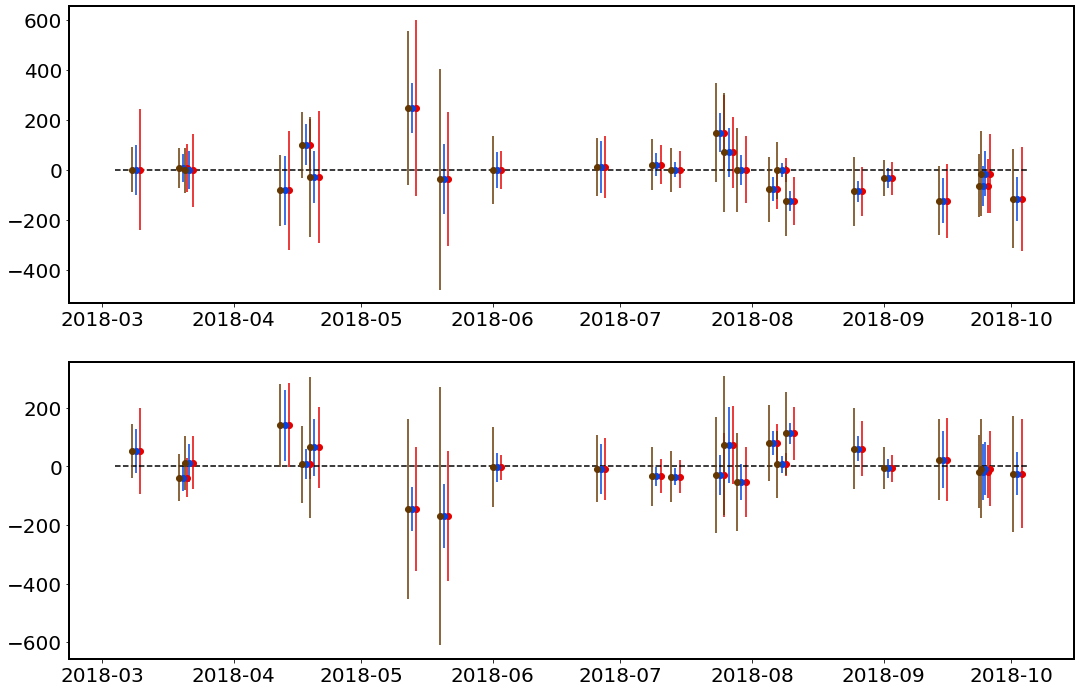

In [18]:
# pt0

fig, axs = plt.subplots(2, 1, figsize=(18, 12))
axs[0].errorbar(df['Center date'].values + pd.Timedelta('1d'), 
             df['pt0_vxdiff'].values, 
             yerr=df['Assigned-x-error'].values * 2, fmt='o', color='xkcd:red')
axs[0].errorbar(df['Center date'].values, 
             df['pt0_vxdiff'].values, 
             yerr=df['SAV-uncertainty-x'].values, fmt='o', color='xkcd:blue')
# xerr=((df['End date'] - df['Start date']) / 2).values,
axs[0].hlines(0, datetime(2018, 3, 4), datetime(2018, 10, 5), linestyles='dashed', color='xkcd:black')
axs[1].errorbar(df['Center date'].values + pd.Timedelta('1d'), 
             df['pt0_vydiff'].values, 
             yerr=df['Assigned-y-error'].values * 2, fmt='o', color='xkcd:red')
axs[1].errorbar(df['Center date'].values, 
             df['pt0_vydiff'].values, 
             yerr=df['SAV-uncertainty-y'].values, fmt='o', color='xkcd:blue')
axs[1].hlines(0, datetime(2018, 3, 4), datetime(2018, 10, 5), linestyles='dashed', color='xkcd:black')

axs[0].errorbar(df['Center date'].values - pd.Timedelta('1d'), 
             df['pt0_vxdiff'].values, 
             yerr=df['LSR-uncertainty-sh'].values * 100, fmt='o', color='xkcd:brown')
axs[1].errorbar(df['Center date'].values - pd.Timedelta('1d'), 
             df['pt0_vydiff'].values, 
             yerr=df['LSR-uncertainty-sh'].values * 100, fmt='o', color='xkcd:brown')

<ErrorbarContainer object of 3 artists>

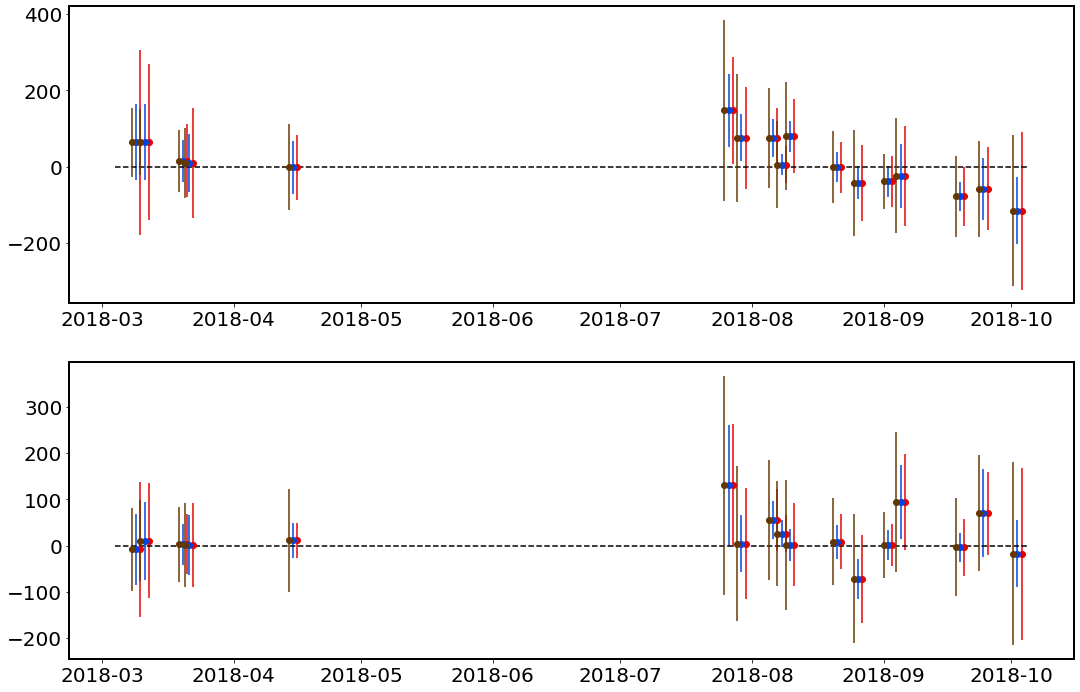

In [19]:
# pt1

fig, axs = plt.subplots(2, 1, figsize=(18, 12))
axs[0].errorbar(df['Center date'].values + pd.Timedelta('1d'), 
             df['pt1_vxdiff'].values, 
             yerr=df['Assigned-x-error'].values * 2, fmt='o', color='xkcd:red')
axs[0].errorbar(df['Center date'].values, 
             df['pt1_vxdiff'].values, 
             yerr=df['SAV-uncertainty-x'].values, fmt='o', color='xkcd:blue')
# xerr=((df['End date'] - df['Start date']) / 2).values,
axs[0].hlines(0, datetime(2018, 3, 4), datetime(2018, 10, 5), linestyles='dashed', color='xkcd:black')
axs[1].errorbar(df['Center date'].values + pd.Timedelta('1d'), 
             df['pt1_vydiff'].values, 
             yerr=df['Assigned-y-error'].values * 2, fmt='o', color='xkcd:red')
axs[1].errorbar(df['Center date'].values, 
             df['pt1_vydiff'].values, 
             yerr=df['SAV-uncertainty-y'].values, fmt='o', color='xkcd:blue')
axs[1].hlines(0, datetime(2018, 3, 4), datetime(2018, 10, 5), linestyles='dashed', color='xkcd:black')

axs[0].errorbar(df['Center date'].values - pd.Timedelta('1d'), 
             df['pt1_vxdiff'].values, 
             yerr=df['LSR-uncertainty-sh'].values * 100, fmt='o', color='xkcd:brown')
axs[1].errorbar(df['Center date'].values - pd.Timedelta('1d'), 
             df['pt1_vydiff'].values, 
             yerr=df['LSR-uncertainty-sh'].values * 100, fmt='o', color='xkcd:brown')

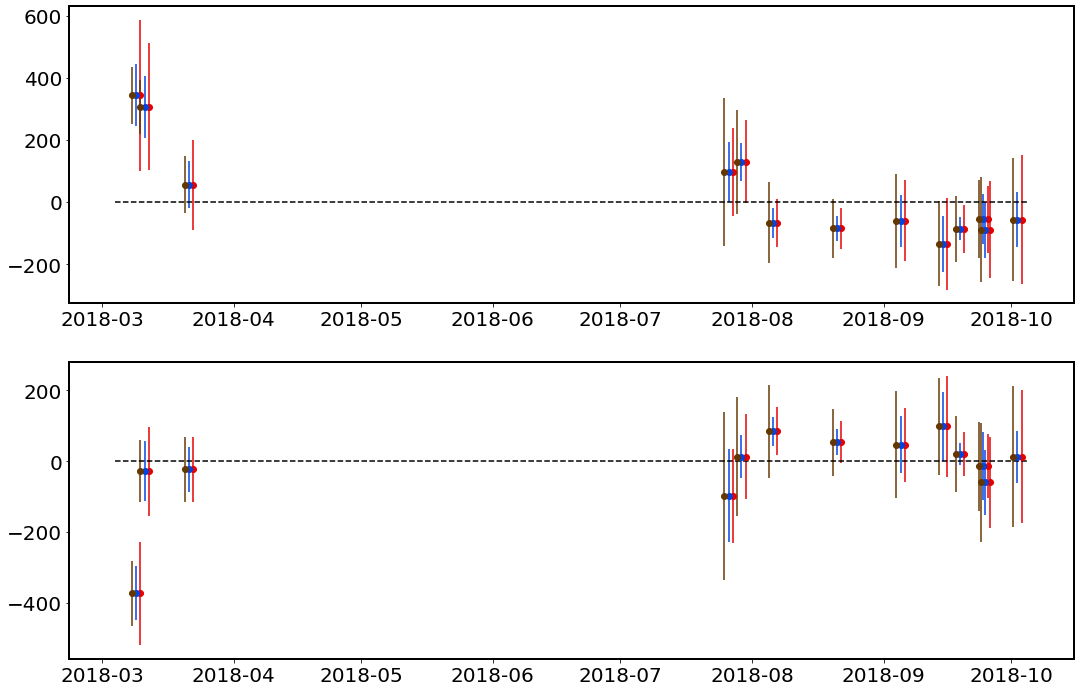

In [20]:
# pt2

fig, axs = plt.subplots(2, 1, figsize=(18, 12))
axs[0].errorbar(df['Center date'].values + pd.Timedelta('1d'), 
             df['pt2_vxdiff'].values, 
             yerr=df['Assigned-x-error'].values * 2, fmt='o', color='xkcd:red')
axs[0].errorbar(df['Center date'].values, 
             df['pt2_vxdiff'].values, 
             yerr=df['SAV-uncertainty-x'].values, fmt='o', color='xkcd:blue')
axs[0].errorbar(df['Center date'].values - pd.Timedelta('1d'), 
             df['pt2_vxdiff'].values, 
             yerr=df['LSR-uncertainty-sh'].values * 100, fmt='o', color='xkcd:brown')
# xerr=((df['End date'] - df['Start date']) / 2).values,
axs[0].hlines(0, datetime(2018, 3, 4), datetime(2018, 10, 5), linestyles='dashed', color='xkcd:black')
axs[1].errorbar(df['Center date'].values + pd.Timedelta('1d'), 
             df['pt2_vydiff'].values, 
             yerr=df['Assigned-y-error'].values * 2, fmt='o', color='xkcd:red')
axs[1].errorbar(df['Center date'].values, 
             df['pt2_vydiff'].values, 
             yerr=df['SAV-uncertainty-y'].values, fmt='o', color='xkcd:blue')
axs[1].errorbar(df['Center date'].values - pd.Timedelta('1d'), 
             df['pt2_vydiff'].values, 
             yerr=df['LSR-uncertainty-sh'].values * 100, fmt='o', color='xkcd:brown')
axs[1].hlines(0, datetime(2018, 3, 4), datetime(2018, 10, 5), linestyles='dashed', color='xkcd:black')

<AxesSubplot:xlabel='SAV-uncertainty-y-m/day', ylabel='LSR-uncertainty-sh-1/day'>

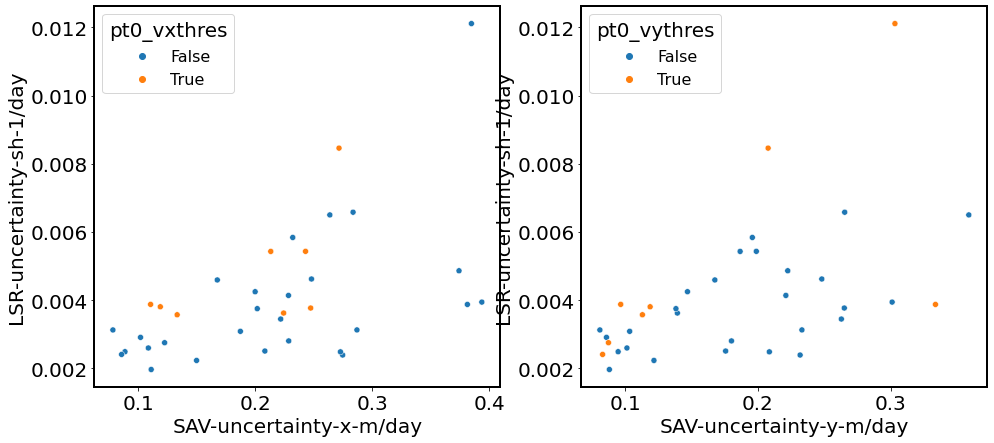

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x-m/day', y='LSR-uncertainty-sh-1/day', hue='pt0_vxthres', ax=axs[0])
# axs[0].set_ylim(0, 0.02)
sns.scatterplot(data=demo, x='SAV-uncertainty-y-m/day', y='LSR-uncertainty-sh-1/day', hue='pt0_vythres', ax=axs[1])

<AxesSubplot:xlabel='SAV-uncertainty-y-m/day', ylabel='LSR-uncertainty-sh-1/day'>

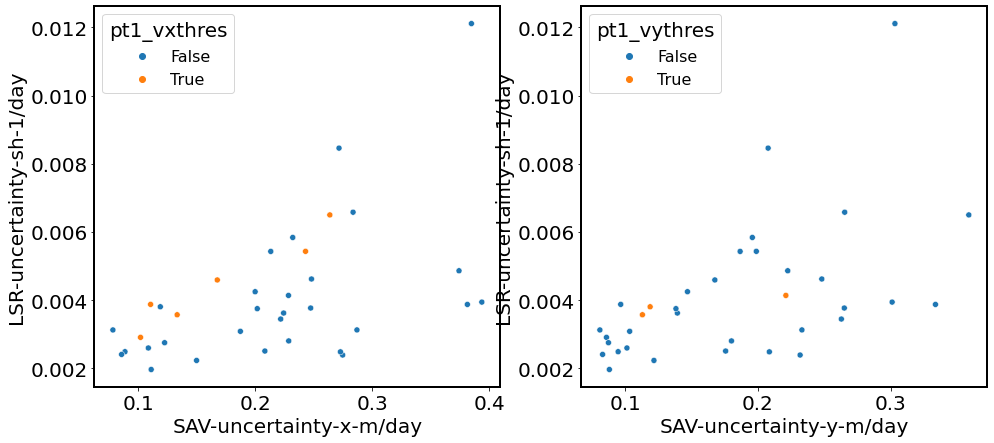

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x-m/day', y='LSR-uncertainty-sh-1/day', hue='pt1_vxthres', ax=axs[0])
# axs[0].set_ylim(0, 0.02)
sns.scatterplot(data=demo, x='SAV-uncertainty-y-m/day', y='LSR-uncertainty-sh-1/day', hue='pt1_vythres', ax=axs[1])

<AxesSubplot:xlabel='SAV-uncertainty-y-m/day', ylabel='LSR-uncertainty-sh-1/day'>

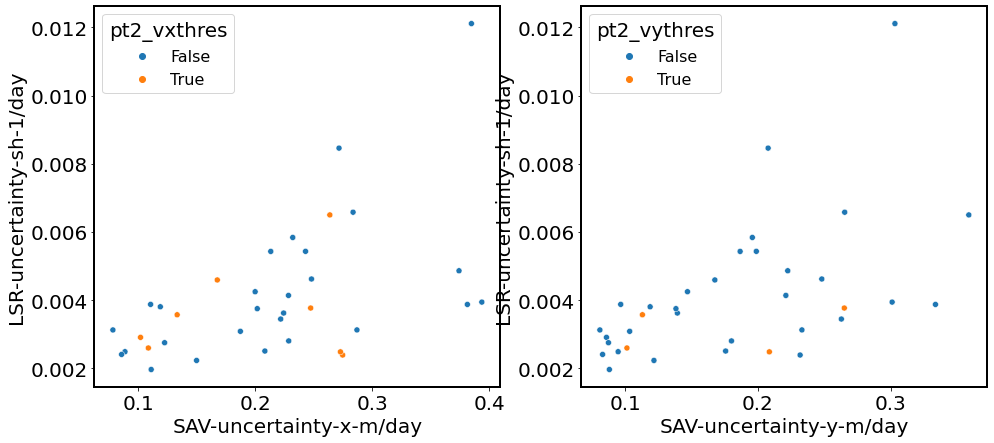

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x-m/day', y='LSR-uncertainty-sh-1/day', hue='pt2_vxthres', ax=axs[0])
# axs[0].set_ylim(0, 0.02)
sns.scatterplot(data=demo, x='SAV-uncertainty-y-m/day', y='LSR-uncertainty-sh-1/day', hue='pt2_vythres', ax=axs[1])

<AxesSubplot:xlabel='Assigned-y-error-m/day', ylabel='LSR-uncertainty-sh-1/day'>

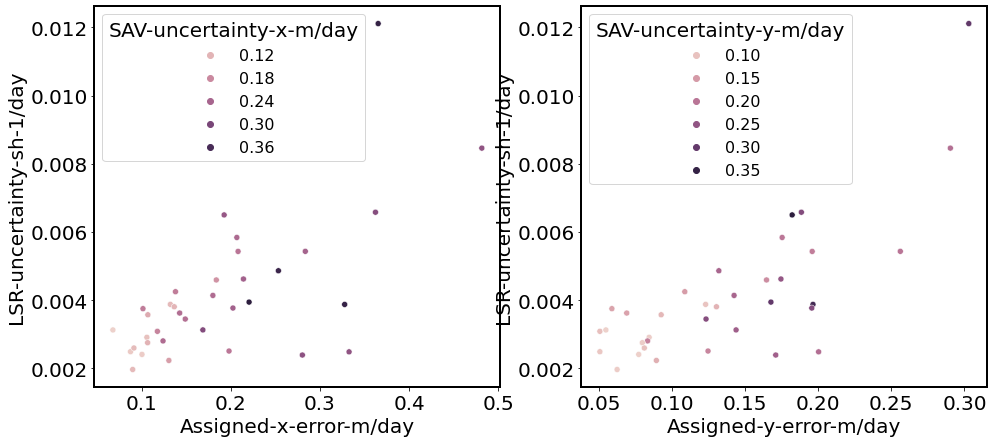

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='Assigned-x-error-m/day', y='LSR-uncertainty-sh-1/day', hue='SAV-uncertainty-x-m/day', ax=axs[0])
# axs[0].set_ylim(0, 0.02)
sns.scatterplot(data=demo, x='Assigned-y-error-m/day', y='LSR-uncertainty-sh-1/day', hue='SAV-uncertainty-y-m/day', ax=axs[1])

(-0.05, 1.05, -0.05, 1.05)

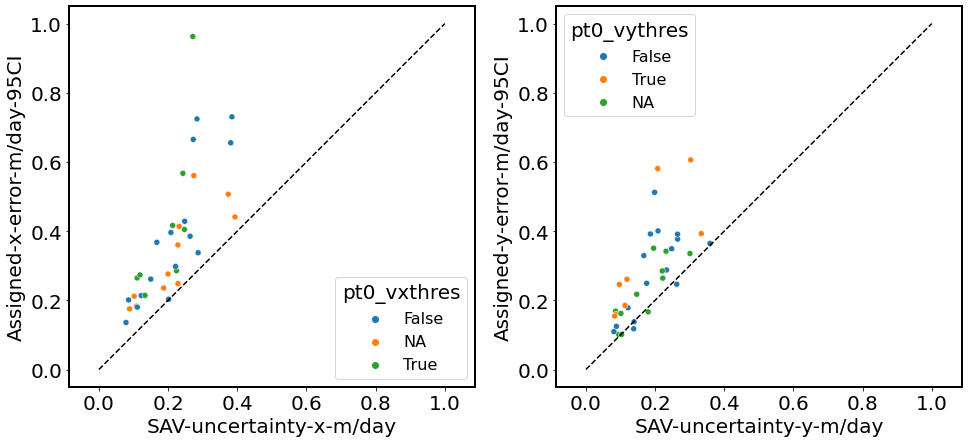

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x-m/day', y='Assigned-x-error-m/day-95CI', hue='pt0_vxthres', ax=axs[0])
axs[0].plot([0, 1], [0, 1], '--', color='k')
axs[0].axis('equal')
# axs[0].set_ylim(0, 0.02)
sns.scatterplot(data=demo, x='SAV-uncertainty-y-m/day', y='Assigned-y-error-m/day-95CI', hue='pt0_vythres', ax=axs[1])
axs[1].plot([0, 1], [0, 1], '--', color='k')
axs[1].axis('equal')

(-0.05, 1.05, -0.05, 1.05)

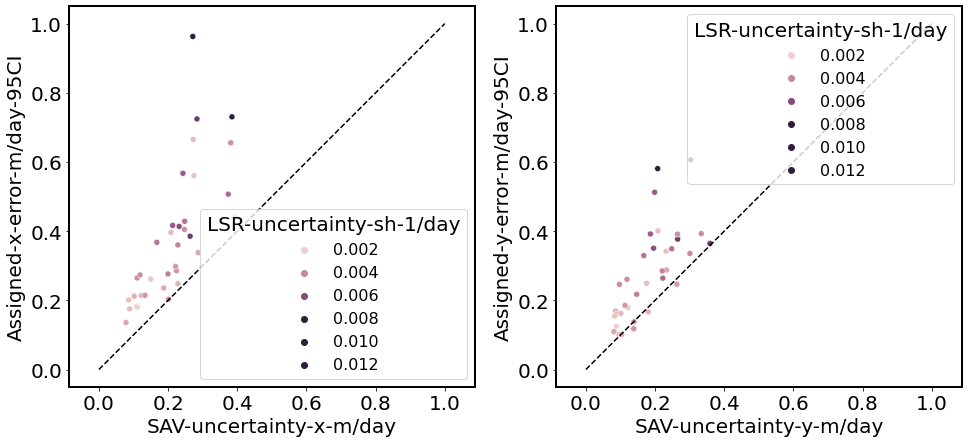

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x-m/day', y='Assigned-x-error-m/day-95CI', hue='LSR-uncertainty-sh-1/day', hue_norm=(0.002,0.008), ax=axs[0])
axs[0].plot([0, 1], [0, 1], '--', color='k')
axs[0].axis('equal')
# axs[0].set_ylim(0, 0.02)
sns.scatterplot(data=demo, x='SAV-uncertainty-y-m/day', y='Assigned-y-error-m/day-95CI', hue='LSR-uncertainty-sh-1/day', hue_norm=(0.002,0.008), ax=axs[1])
axs[1].plot([0, 1], [0, 1], '--', color='k')
axs[1].axis('equal')

(-0.05, 1.05, -0.05, 1.05)

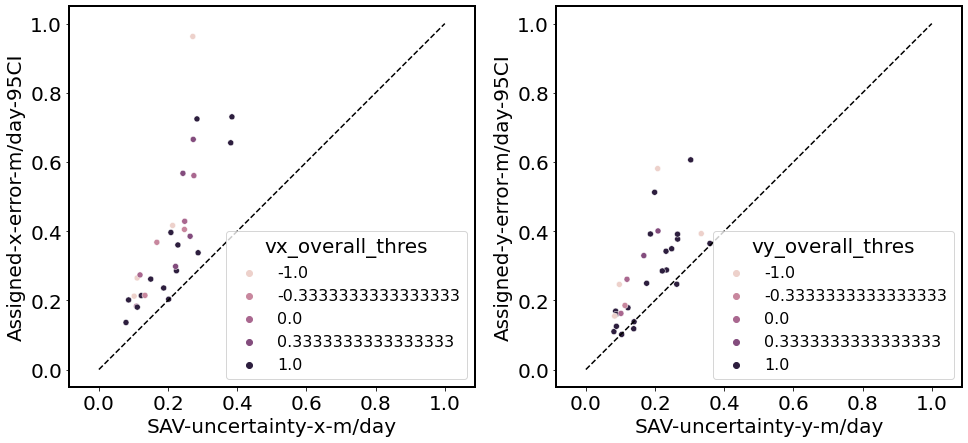

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x-m/day', y='Assigned-x-error-m/day-95CI', hue='vx_overall_thres', ax=axs[0])
axs[0].plot([0, 1], [0, 1], '--', color='k')
axs[0].axis('equal')
# axs[0].set_ylim(0, 0.02)
sns.scatterplot(data=demo, x='SAV-uncertainty-y-m/day', y='Assigned-y-error-m/day-95CI', hue='vy_overall_thres', ax=axs[1])
axs[1].plot([0, 1], [0, 1], '--', color='k')
axs[1].axis('equal')

In [61]:
df['pt0_vthres'] = np.abs(df['pt0_vdiff']) > df['pt0_verr']
df['pt1_vthres'] = np.abs(df['pt1_vdiff']) > df['pt1_verr']
df['pt2_vthres'] = np.abs(df['pt2_vdiff']) > df['pt2_verr']
# df['pt0_vthres'] = np.abs(df['pt0_vdiff']) > 2*df['pt0_verr']
# df['pt1_vthres'] = np.abs(df['pt1_vdiff']) > 2*df['pt1_verr']
# df['pt2_vthres'] = np.abs(df['pt2_vdiff']) > 2*df['pt2_verr']

<AxesSubplot:xlabel='pt2_vdiff', ylabel='pt2_verr'>

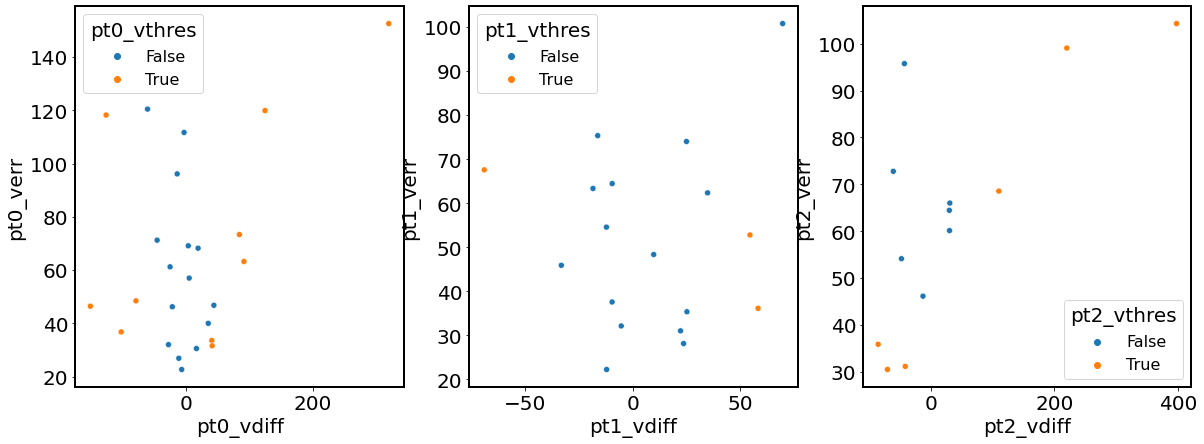

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))
sns.scatterplot(data=demo, x='pt0_vdiff', y='pt0_verr', hue='pt0_vthres', ax=axs[0])
sns.scatterplot(data=demo, x='pt1_vdiff', y='pt1_verr', hue='pt1_vthres', ax=axs[1])
sns.scatterplot(data=demo, x='pt2_vdiff', y='pt2_verr', hue='pt2_vthres', ax=axs[2])

In [56]:
df.head()

,Label,Start date,End date,Duration (days),Template size (px),Template size (m),Pixel spacing (px),Pixel spacing (m),Prefilter,Subpixel,...,pt1_vxavgthres,pt1_vyavgthres,pt2_vxthres,pt2_vythres,pt2_vxavgthres,pt2_vyavgthres,pt0_vthres,pt1_vthres,pt2_vthres,Center date
0,LS8-20180304-20180405,2018-03-04 00:00:00,2018-04-05 00:00:00,32.0,NaN,varying (240-480),NaN,120.0,ITS_LIVE (5x5 Wallis operator),ITS_LIVE (16-node oversampling),...,False,False,False,False,False,False,False,False,False,2018-03-20
1,LS8-20180405-20180421,2018-04-05 00:00:00,2018-04-21 00:00:00,16.0,NaN,varying (240-480),NaN,120.0,ITS_LIVE (5x5 Wallis operator),ITS_LIVE (16-node oversampling),...,False,False,False,False,False,False,True,False,False,2018-04-13
2,LS8-20180421-20180523,2018-04-21 00:00:00,2018-05-23 00:00:00,32.0,NaN,varying (240-480),NaN,120.0,ITS_LIVE (5x5 Wallis operator),ITS_LIVE (16-node oversampling),...,False,False,False,False,False,False,False,False,False,2018-05-07
3,LS8-20180523-20180608,2018-05-23 00:00:00,2018-06-08 00:00:00,16.0,NaN,varying (240-480),NaN,120.0,ITS_LIVE (5x5 Wallis operator),ITS_LIVE (16-node oversampling),...,False,False,False,False,False,False,False,False,False,2018-05-31
4,LS8-20180412-20180428,2018-04-12 00:00:00,2018-04-28 00:00:00,16.0,NaN,varying (240-480),NaN,120.0,ITS_LIVE (5x5 Wallis operator),ITS_LIVE (16-node oversampling),...,False,False,False,False,False,False,False,False,False,2018-04-20
